In [1]:
!pip install scikit-learn==0.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.0 which is incompatible.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [55]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [56]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
model=DecisionTreeRegressor()
treinamento=model.fit(X_train,y_train)
treinamento.predict(X_test)

array([21.6, 27.9,  8.1, 24.7, 15.2, 21.6, 19. , 17.8, 21.4, 18.9, 20.5,
       19.5,  5.6, 21.2, 17.1, 22. , 20.5, 10.5, 43.1, 14.6, 24.7, 24.4,
       13.6, 20.6, 16.7, 14.6, 22. , 13.5, 20.5, 22. , 20.3, 22.9, 36.5,
       15.3, 14.4, 13.8, 31.2, 19. , 22.4, 24.1, 23.1, 37.2, 35.2, 26.4,
       22. ,  8.5, 14.8, 24.7, 23.2, 32. , 19.1, 34.9, 14.8, 30.1, 43.1,
       20.7, 17.8, 34.9, 22.9, 19.4, 27.5, 29. , 29.4, 18.2, 24.5, 14.4,
        8.5, 22.9, 32.5, 14.4, 22.6, 29.4,  8.4, 24.7, 20.7,  5.6, 19.8,
       35.2, 10.2, 13.1, 22. , 16.3, 19.6, 10.5, 20.3, 25.1, 14.1, 23. ,
       22.1, 18.4, 22.6,  7.2, 19.2, 19.3, 18.6, 19.6, 50. , 16.3, 11.8,
       16.3, 17.5, 21.2, 14.6, 20.4, 24.7, 11.8, 20.4, 24.8, 17.5, 21.9,
        8.4, 16.3, 22.2, 22.6, 31.7, 16.7, 46. , 18.1, 15.3, 23.7, 17.1,
       25. ,  8.3, 19.1, 24.7, 22.9, 23.3, 37.2, 18.3, 50. , 15.4, 18.6,
       18.2, 27.1, 11.8, 21.7, 19.8, 29. , 29.8, 18.1, 21.4, 23.7, 19.3,
       14.4,  5.6, 20.1, 13.8, 14.6, 13.6, 48.3, 14

 - 2. Calcule o caminho indicado pelos ccp-alfas dessa arvore

In [58]:
path =treinamento.cost_complexity_pruning_path(X_train,y_train)

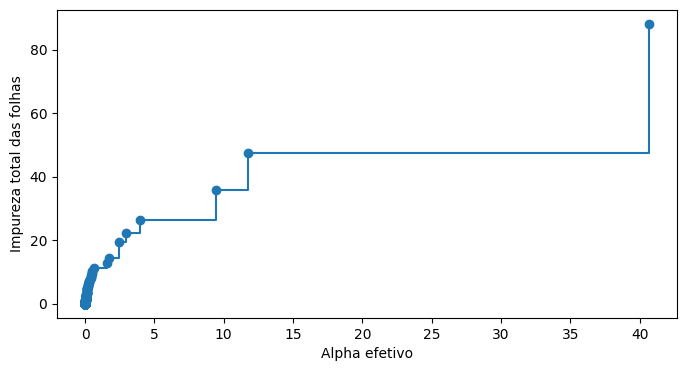

In [59]:
ccp_alphas,impurities = path.ccp_alphas,path.impurities

plt.figure(figsize=(8,4))
plt.plot(ccp_alphas,impurities,marker="o", drawstyle="steps-post")
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas');

- 3. Para cada valor de alpha obtido no item 2, treine uma arvore com o respectivo alfa, e guarde essa arvore em uma lista. 

In [60]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


In [61]:
print(clfs)

[DecisionTreeRegressor(random_state=0), DecisionTreeRegressor(ccp_alpha=5.030391049629028e-16, random_state=0), DecisionTreeRegressor(ccp_alpha=6.707188066172037e-16, random_state=0), DecisionTreeRegressor(ccp_alpha=1.0060782099258056e-15, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262534847586e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262535182944e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262535518304e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262535853663e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262536189024e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262536524383e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262536859742e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262536859742e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262536859742e-05, random_state=0), DecisionTreeRegressor(ccp_alpha=1.4749262536859742e-05, random_state=0), DecisionTreeR

- 4. Para cada arvore na lista, calcule o MSE da arvore

In [62]:
train_score=[mean_squared_error(y_train,clf.predict(X_train)) for clf in clfs]
test_score=[mean_squared_error(y_test,clf.predict(X_test)) for clf in clfs]

 - 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

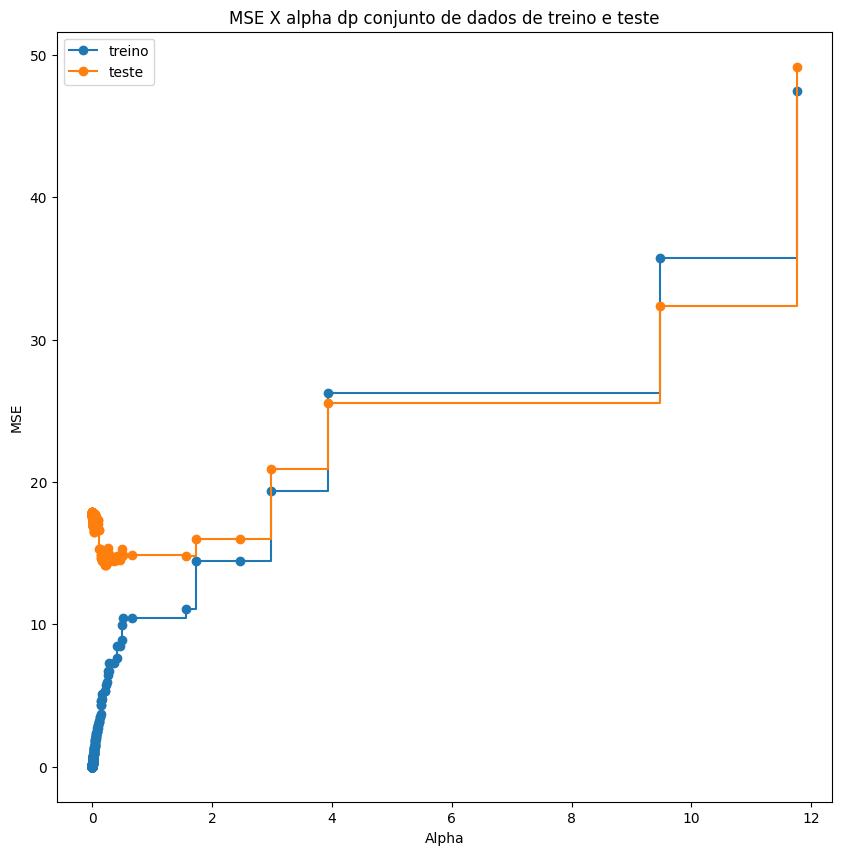

In [63]:


fig,ax=plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE X alpha dp conjunto de dados de treino e teste')
ax.plot(ccp_alphas[:-1],train_score[:-1],marker="o",label='treino',drawstyle="steps-post")
ax.plot(ccp_alphas[:-1],test_score[:-1],marker="o",label='teste',drawstyle="steps-post")
ax.legend()
plt.show()

Acredito que  entre o ponto 2 e 3 seria o melhor ponto. Escolho o ponto 2

6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [65]:
arvore_final= DecisionTreeRegressor(random_state=0, ccp_alpha=2)
arvore_final.fit(X_train, y_train)
print(f"R_quadrado na base de testes:{arvore_final.score(X_test,y_test):.2f}")

R_quadrado na base de testes:0.79


- 7.Visualização da arvore

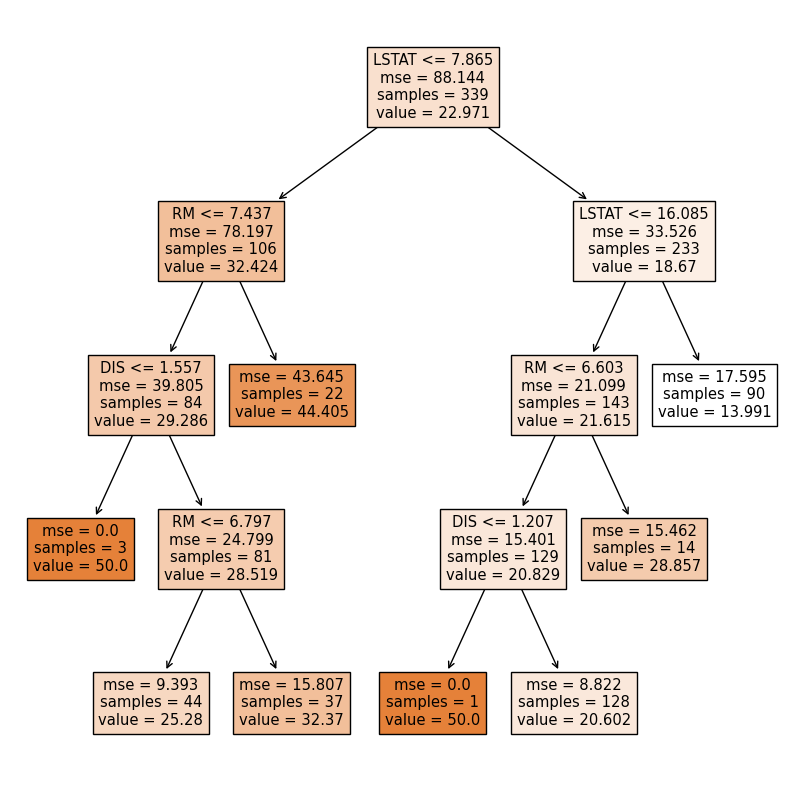

In [68]:
plt.rc('figure',figsize=(10,10))
tp = tree.plot_tree(arvore_final,feature_names=X.columns,filled=True)